In [10]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import seaborn as sns
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 20
pd.options.display.float_format = '{:.4f}'.format

In [11]:
train_df = pd.read_csv("./train.csv", sep=",")
test_df = pd.read_csv("./test.csv", sep=",")

In [12]:
train_df
#train_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


In [13]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.0000,418.0000,332.0000,418.0000,418.0000,417.0000
mean,1100.5000,2.2656,30.2726,0.4474,0.3923,35.6272
std,120.8105,0.8418,14.1812,0.8968,0.9814,55.9076
min,892.0000,1.0000,0.1700,0.0000,0.0000,0.0000
25%,996.2500,1.0000,21.0000,0.0000,0.0000,7.8958
50%,1100.5000,3.0000,27.0000,0.0000,0.0000,14.4542
75%,1204.7500,3.0000,39.0000,1.0000,0.0000,31.5000
max,1309.0000,3.0000,76.0000,8.0000,9.0000,512.3292


In [14]:
def find_na(df):
    l = []
    for label in df.columns:
        if df[label].dropna().shape[0] != df.shape[0]:
            l.append(label)
    return l
find_na(train_df)

['Age', 'Cabin', 'Embarked']

In [15]:
correlation_dataframe = train_df.copy()
correlation_dataframe["target"] = correlation_dataframe["Survived"]
cordf = correlation_dataframe.corr()
cordf

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,target
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127,-0.0050
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573,1.0000
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495,-0.3385
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961,-0.0772
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597,-0.0353
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162,0.0816
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000,0.2573
target,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573,1.0000


In [16]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Mr. Thomas William Solomon",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [17]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [18]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.6296
1,2,0.4728
2,3,0.2424


In [19]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.7420
1,male,0.1889


In [20]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.5359
2,2,0.4643
0,0,0.3454
3,3,0.2500
4,4,0.1667
5,5,0.0000
6,8,0.0000


In [21]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.6000
1,1,0.5508
2,2,0.5000
0,0,0.3437
5,5,0.2000
4,4,0.0000
6,6,0.0000


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


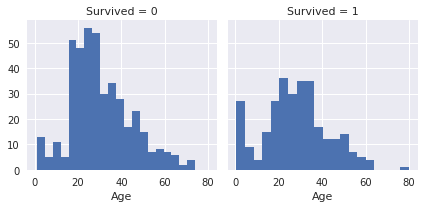

In [22]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


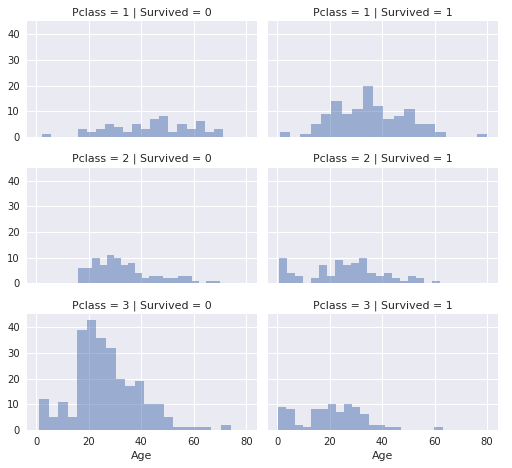

In [23]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


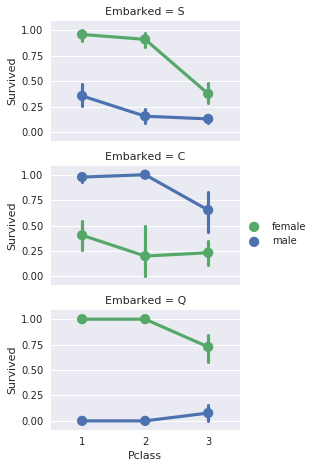

In [24]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [25]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


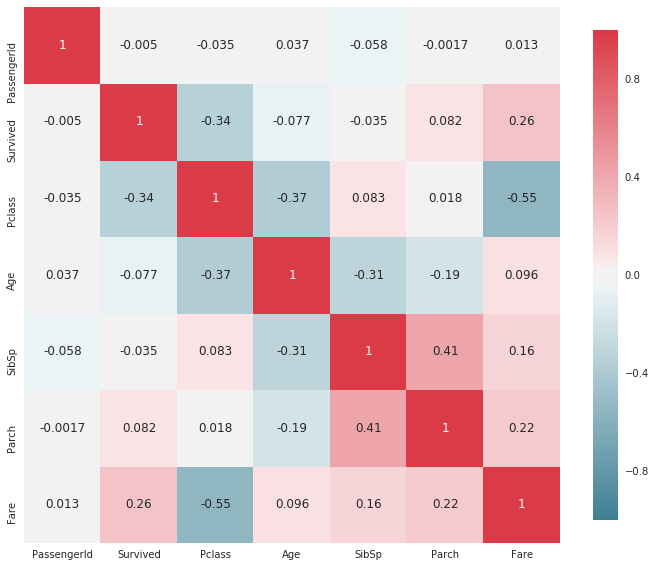

In [26]:
plot_correlation_map(train_df)

In [27]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()


/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


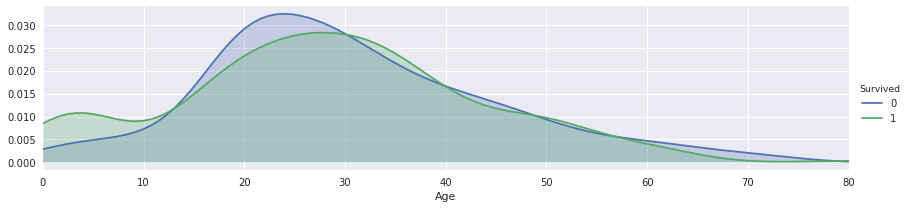

In [28]:
#plot_distribution( train_df , var = 'Age' , target = 'Survived' , row = 'Sex' )
plot_distribution( train_df , var = 'Age' , target = 'Survived')

In [29]:
#what age does males/females have a higher or lower probablility of survival? 
#male has higher rate of survival between ages 0~10
#female has higher rate of survival between ages 30~40

In [30]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

/home/rainbowww5/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


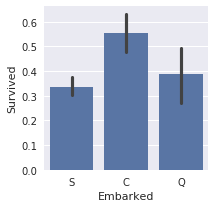

In [31]:
plot_categories( train_df , cat = 'Embarked' , target = 'Survived' )

In [32]:
full = train_df.append( test_df, ignore_index = True )
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [33]:
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
